# Cryptocurrency prices

* **Filename:**  `cryptocurrencies.csv`
* **Description:** Cryptocurrency prices for a handful of coins over time.
* **Source:** https://coinmarketcap.com/all/views/all/ but from a million years ago (I cut and pasted, honestly)

### Make a chart of bitcoin's high, on a weekly basis

You might want to do the cherry blossoms homework first, or at least read the part about `format=` and `pd.to_datetime`.

*Yes, that's the entire assignment. It isn't an exciting dataset, but it's just dirty enough to make charting this a useful experience.*

In [1]:
import pandas as pd
from pprintpp import pprint as pp
import numpy as np 

df = pd.read_csv("cryptocurrencies.csv")
df_bitcoin = df[df.coin == "BTC"]
df_bitcoin

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


date      open      high       low     close         volume  \
0    12-Feb-18  8,141.43  8,985.92  8,141.43  8,926.57  6,256,440,000   
1    11-Feb-18  8,616.13  8,616.13  7,931.10  8,129.97  6,122,190,000   
2    10-Feb-18  8,720.08  9,122.55  8,295.47  8,621.90  7,780,960,000   
3     9-Feb-18  8,271.84  8,736.98  7,884.71  8,736.98  6,784,820,000   
4     8-Feb-18  7,637.86  8,558.77  7,637.86  8,265.59  9,346,750,000   
..         ...       ...       ...       ...       ...            ...   
360  17-Feb-17  1,026.12  1,053.17  1,025.64  1,046.21    136,474,000   
361  16-Feb-17  1,007.65  1,033.37  1,007.65  1,027.44    122,277,000   
362  15-Feb-17  1,006.21  1,008.84  1,001.58  1,007.48     89,759,400   
363  14-Feb-17    991.74  1,011.51    986.47  1,004.55    137,946,000   
364  13-Feb-17    998.89  1,002.10       976    990.64    100,607,000   

          market_cap coin  
0    137,258,000,000  BTC  
1    145,245,000,000  BTC  
2    146,981,000,000  BTC  
3    139,412,000,000  BTC  
4    128,714,000,000  BTC  
..               ...  ...  
360   16,589,600,000  BTC  
361   16,289,100,000  BTC  
362   16,264,100,000  BTC  
363   16,028,000,000  BTC  
364   16,141,500,000  BTC  

[365 rows x 8 columns]

In [2]:
#Put date to datetime
df_bitcoin.date = pd.to_datetime(df_bitcoin.date)

/Users/shaneburke/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [3]:
#Get rid of commas in the high column so we can change its type to float
df_bitcoin.high = df_bitcoin.high.str.replace(",", "")

#Change to float
df_bitcoin.high = df_bitcoin.high.astype(float)

In [4]:
#Verify the column types
df_bitcoin.dtypes

date          datetime64[ns]
open                  object
high                 float64
low                   object
close                 object
volume                object
market_cap            object
coin                  object
dtype: object

In [5]:
#Set the index to date
df_bitcoin = df_bitcoin.set_index('date')

In [6]:
#df_bitcoin to verify it all looks right

Max Weekly Bitcoin Price, February 2018 to March 2018


<AxesSubplot:xlabel='date'>

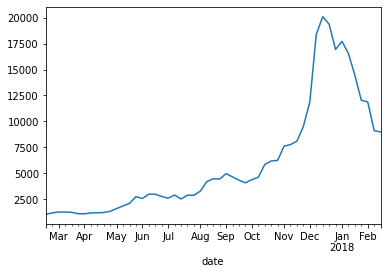

In [7]:
print("Max Weekly Bitcoin Price, February 2018 to March 2018")
df_bitcoin.resample('W').high.max().plot()